### Project File
### Mahyar Sadeghi Garjan
### 5283082

### Project title: Hybrid Images

# 1.What are Hybrid Images?
#### Hybrid images are created to make an ilusion for the human being's visual system. This ilusion is based on distance. If you take a closer look you will see one picture and if you look at it from distance it will appear as another object. Here is an example of Hybrid images:
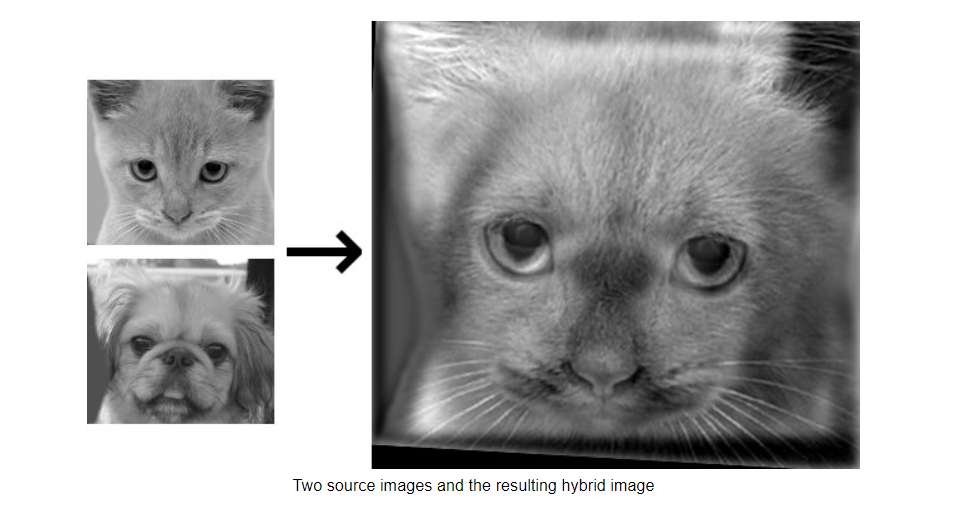



### How can we make a Hybrid Image?:
#### In  order to create such an ilusion we need to apply a Low-pass filter and a High-Pass filter and then add them together. It is used Fourier Transform to simplify operations of convolutions(because in this domain, convolution is just a simple Multiplication,hence computationally cheaper) and then add them to find the result. Lets start by importing and initilization:


In [1]:
import numpy as np
from skimage import io , color
import skimage.filters as flt
from  scipy import signal
import matplotlib.pyplot as plt
import cv2
from skimage import data, img_as_float



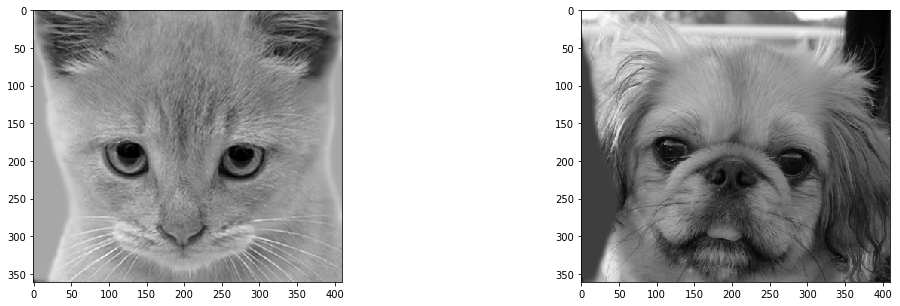

In [2]:
img1=color.rgb2gray( io.imread('img1.jpg'))
img2=color.rgb2gray(io.imread('img2.jpg'))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray')

plt.show()


### What are low-pass and High-pass filters?
Low-Pass filters allow the signals with low frequency to be considered as output and blocks the high frequency
Signals. The High-Pass filters are in contrast to this definition. 
Here we will use the gaussian bluring which is a low-pass in it's nature. The strength of this filter can be controlled by sigma.

### Steps to apply a filter in fourier domain:
1. Find the fourier transform of the image
2. Find the fourier transform of the kernel
3. Multiply these two arrays
4. Apply inverse fourier transform

These can be done using the fourier_gaussian in scipy:


In [3]:
from scipy import ndimage, misc
def gaussian_in_fourier_domain(img,sigma):
    input_ = np.fft.fft2(img)
    result = ndimage.fourier_gaussian(input_, sigma)
    result = np.fft.ifft2(result)
    return result.real

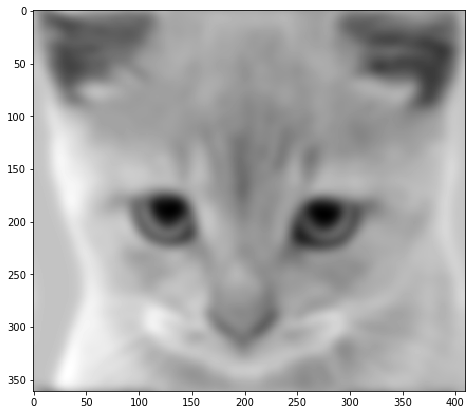

In [20]:
plt.figure(figsize=(18,7))
img1_lp=gaussian_in_fourier_domain(img1,5)
plt.imshow(img1_lp,cmap='gray')

### How to obtain the High-Pass filter from Low-pass?
Gaussian blur is the low-pass filter in it's nature. In order to obtain the high pass frequency from low-pass we just need to subtract the result of low-pass filter from image itself. This will lead us to the output which contains higher frequencies or details of the picture.

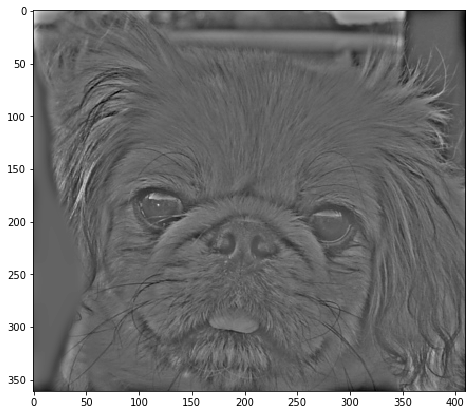

In [21]:
#High pass gaussian filter:
# High pass gaussian filter can be defined as Image itself minus the its blured one . So we have: 
img2_hp=img2 - gaussian_in_fourier_domain(img2,  6)
plt.figure(figsize=(18,7))
plt.imshow(img2_hp,cmap='gray')
plt.show()

### Final Result which is the summation of these two images:

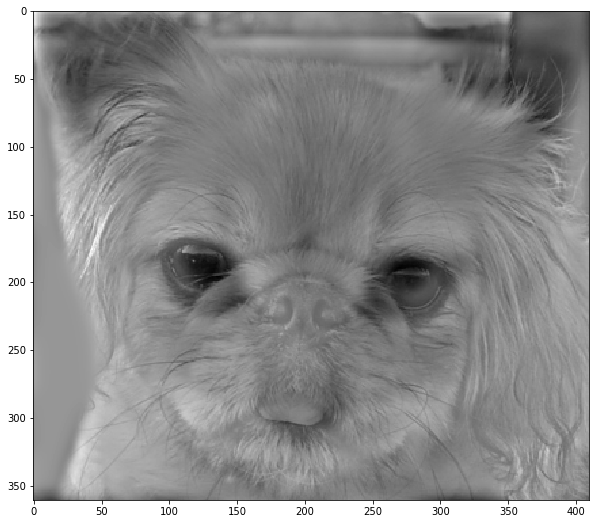

In [22]:
#Finally the hybrid is defined as:
hybrid=img2_hp + img1_lp
plt.figure(figsize=(18,9))
plt.imshow(hybrid,cmap='gray')
plt.show()

#### The manipulation of these low and high pass filters can lead to different results:
For example if we choose the cutoff frequency a bigger number for our high-pass filter, more details will be appered in the final image. For example here we will choose sigma 20 which allows us just to keep higher frequencies.


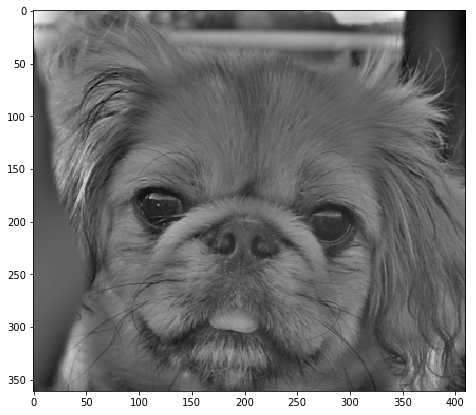

In [14]:
img2_hp=img2 - gaussian_in_fourier_domain(img2,  20)
plt.figure(figsize=(18,7))
plt.imshow(img2_hp,cmap='gray')
plt.show()

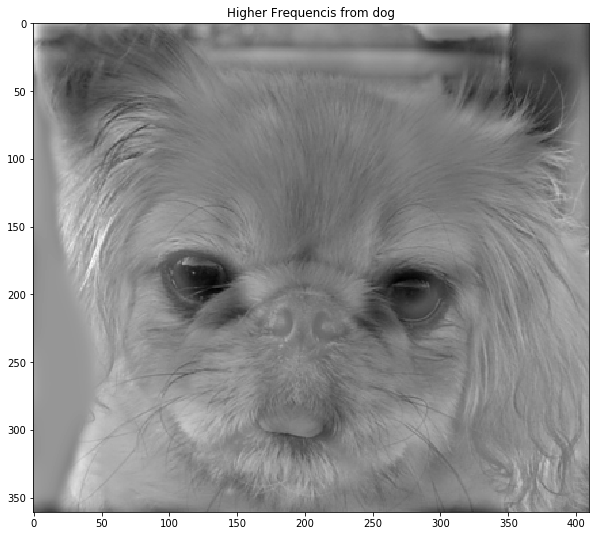

In [23]:
hybrid1=img2_hp + img1_lp
plt.figure(figsize=(18,9))
plt.imshow(hybrid1,cmap='gray')
plt.title('Higher Frequencis from dog')
plt.show()

As much as we increase the sigma for the dog's image to get the higher frequencis, in the final result the dog's structure will be more dominant. 
### Notice:
The image we choose to apply the low-pass or high-pass filter has a effect on the output too.
For example in the previouse experiments we applied high-pass filter on dog's image. 
This means we took details from dof and the overall-genral shape and structure from the cat.
In the following we will make an experiment in contrst with the previouse ones:


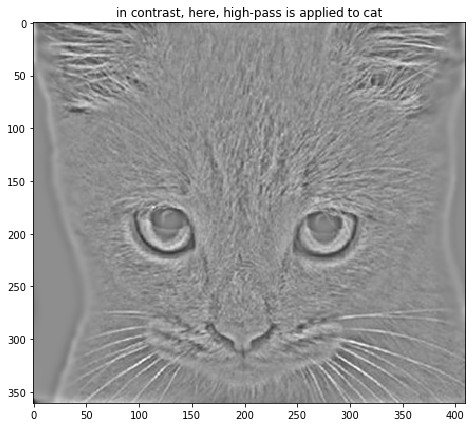

In [24]:
plt.figure(figsize=(18,7))
img1_lp=img1-gaussian_in_fourier_domain(img1,5)
plt.title('in contrast, here, high-pass is applied to cat')
plt.imshow(img1_lp,cmap='gray')

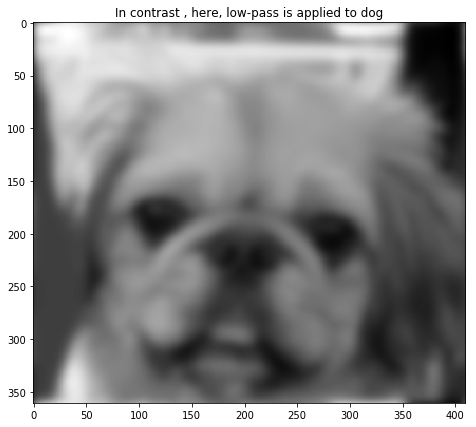

In [28]:
img2_hp=gaussian_in_fourier_domain(img2,  5)

plt.figure(figsize=(18,7))


plt.title('In contrast , here, low-pass is applied to dog')
plt.imshow(img2_hp,cmap='gray')

plt.show()

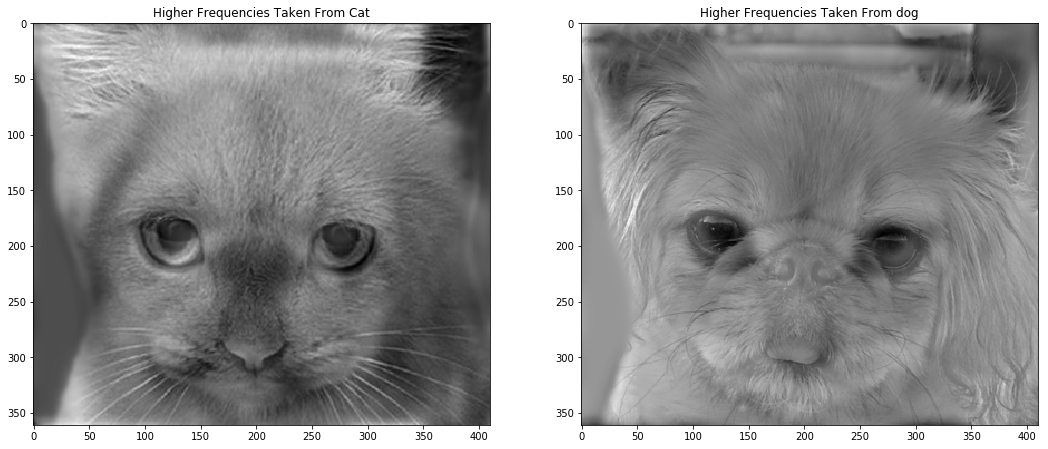

In [27]:
hybrid2=img2_hp + img1_lp
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(hybrid2,cmap='gray')
plt.title('Higher Frequencies Taken From Cat')
plt.subplot(1,2,2)
plt.title('Higher Frequencies Taken From dog')
plt.imshow(hybrid,cmap='gray')

plt.show()

#### As it was expected:
In each image details come from the image that high-pass filter was applied on it. As a result in the leftmost image,
hair of the cat is appeared. But in the image right , hair of the dog is shown.
Notice that here hair of the both animals are considered as the details, hence they contian higher frequencies.